# Modelo del rendimiento de una cuenta de ahorro

<img style="center" src="https://static.pexels.com/photos/9660/business-money-pink-coins.jpg" width="500px" height="200px" alt="atom"/>

> **¿Tiene el dinero el mismo valor a lo largo del tiempo?** La respuesta es *no*. Todos lo hemos vivido. 

> Dos situaciones básicas:
1. <font color=blue>Inflación</font>: ¿Cuánto dinero necesitabas para comprar unas papas y un refresco hace 10 años? ¿Cuánto necesitas hoy?
2. <font color=blue>Interés</font>: no es lo mismo tener $\$10000$ MXN disponibles hoy a recibir $\$10000$ MXN en un año, pues los primeros pueden ser invertidos en un negocio o una cuenta bancaria para generar **interés**. Por lo tanto los $\$10000$ MXN disponibles hoy valen más que los $\$10000$ MXN que se recibirán en un año.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)

Referencias:
- http://www.sympy.org
- http://matplotlib.org
- http://www.numpy.org
- http://ipywidgets.readthedocs.io/en/latest/index.html

___
## Interés
Nos centraremos en como cambia el valor del dinero en el tiempo debido al **interés**. Existen dos tipos:

### Capitalización por interés simple
Este tipo de interés se calcula <font color=red>única y exclusivamente sobre la cantidad original que se invirtió</font>. Como consecuencia, el interés generado no forma parte del dinero que se invierte, es decir, los <font color=blue>intereses no ganan intereses</font>.

Suponga que se tiene un capital inicial $C_0$ y se invierte a un plazo de $k$ periodos (pueden ser meses, trimestres, semestres, años...) a una tasa de **interés simple** por periodo $i$. Al final del primer periodo, el capital $C_1$ que se obtiene es:

$$C_1=C_0+iC_0=C_0(1+i).$$

De la misma manera, como el interés solo se calcula sobre el capital inicial, al final del segundo periodo, el capital $C_2$ que se obtiene es:

$$C_2=C_1+iC_0=C_0+iC_0+iC_0=C_0(1+2i).$$

Así, al final del $k-$ésimo periodo, el capital $C_k$ que se obtiene es:

$$C_k=C_{k-1}+iC_0=C_0+kiC_0=C_0(1+ki).$$

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés simple del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [1]:
# Importar librería numpy
import numpy as np

# Datos del problema
C0 = 10000
i = 0.008
Cf = 11000

# Despejar k tal que C_k=meta
k = np.ceil(((Cf/C0)-1)/i)
k = k.astype(int)
Ck = C0*(1+k*i)
Ck = round(Ck,2)
# Imprimimos respuesta en pantalla
print("El número de períodos que se debe dejar invertido el dinero es ",k,". Al final del perído ",k," el capital es ",Ck)

El número de períodos que se debe dejar invertido el dinero es  13 . Al final del perído  13  el capital es  11040.0


> <font color=blue>**Actividad.**</font>
1. ¿Qué pasa si el interés no es del $0.8\%$ mensual sino del $1\%$ mensual?
2. ¿Qué pasa si la meta no son $\$11000$ MXN si no $\$12000$ MXN?

In [5]:
# Solución 1
# Datos del problema
C0 = 10000
i = 0.01
Cf = 11000

k = np.ceil(((Cf/C0) - 1) / i)
k
Ck = C0 * (1 + k * i)
Ck

11100.000000000002

In [7]:
# Solución 2
# Datos del problema
C0 = 10000
i = 0.008
Cf = 12000

k = np.ceil(((Cf/C0) - 1) / i)
# k
Ck = C0 * (1 + k * i)
Ck

12000.0

> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

In [10]:
# Librerías para gráficos
import matplotlib.pyplot as plt
# Para que se muestren las gráficas en la misma ventana
%matplotlib inline
# Librería para widgets de jupyter
from ipywidgets import *

def interes_simple(C_0, meta, i):
    # Despejamos k
    k = np.ceil((meta/C_0 - 1)/i)           # Notar el uso de la función ceil
    k = k.astype(int)                       # Conversión a entero
    C_k = C_0*(1+k*i)                       # Cálculo del capital al final del periodo k
    C_k = round(C_k, 2)                     # Redondeo con dos cifras decimales
    # Vector de periodos
    kk = np.linspace(0,k,k+1)               
    # Vector de capitales por periodo
    CC = C_0*(1+kk*i)
    # Gráfico
    plt.figure(num=1); 
    # Figura 1, borrar lo que contenga
    plt.clf()            
    # Se grafica la evolución de los capitales
    plt.plot(kk, CC,'*',ms=10)              
    # Se grafica la meta
    plt.plot(kk,meta*np.ones(k+1),'--k')    
    # Etiqueta eje x
    plt.xlabel('$k$',fontsize=18)                         
    # Etiqueta eje y
    plt.ylabel('$C_k$',fontsize=18)                       
    # Malla en la gráfica
    plt.grid(True)                          
    # Mostrar la figura
    plt.show()                              
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")
    
interact_manual(interes_simple, C_0=fixed(10000), meta=(10000,12000,100), i=(0.001, .008, 0.001));

interactive(children=(IntSlider(value=11000, description='meta', max=12000, min=10000, step=100), FloatSlider(…

Como se esperaba, el capital en el $k-$ésimo periodo $C_k=C_0(1+ki)$ crece linealmente con $k$.

### Capitalización por interés compuesto
El capital que genera el interés simple permanece constante todo el tiempo de duración de la inversión. En cambio, el que produce el interés compuesto en un periodo se <font color=red>convierte en capital en el siguiente periodo</font>. Esto es, el interés generado al final de un periodo <font color=blue>se reinvierte para el siguiente periodo para también producir interés</font>.

Suponga que se tiene un capital inicial $C_0$, y se va a ceder el uso de este capital por un periodo de tiempo determinado a una tasa de interés $i$. El capital que se obtiene al final del primer periodo $C_1$ se puede calcular por

$$C_1=C_0(1+i).$$ 

Si la anterior suma se vuelve a ceder a la misma tasa de interés, al final del periodo dos el capital $C_2$ es 

$$C_2=C_1(1+i)=C_0(1+i)^2.$$

Si se repite el anterior proceso $k$ veces, el capital al final del $k-$ésimo periodo $C_k$ es 

$$C_k=C_{k-1}(1+i)=C_0(1+i)^k.$$

**Referencia**:
- https://es.wikipedia.org/wiki/Inter%C3%A9s_compuesto.

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [11]:
#Solución
C0 = 10000
Cf = 11000
i = 0.008

k = np.ceil(np.log(Cf/C0)/np.log(1+i))
k = k.astype(int)

Ck = C0*(1+i)**k
Ck = round(Ck,2)

print("El número de periodos que se debe dejar invertido el dinero es ",k,". Al final del período ",k," el capital ",Ck)

El número de periodos que se debe dejar invertido el dinero es  12 . Al final del período  12  el capital  11003.39


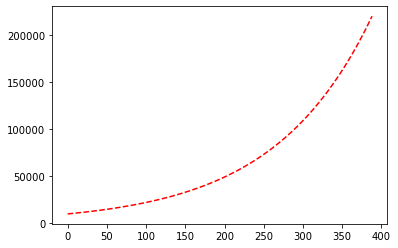

In [20]:
def f1(C0, meta, i):
    k = np.ceil(np.log(meta/C0)/np.log(1+i))
    k = k.astype(int)
    
    kk = np.linspace(0, k, k + 1)

    Ck = C0*(1+i)**kk    
    
    plt.figure(num=1)
    plt.clf()
    
    plt.plot(kk, Ck, 'r--')
    
    plt.show()
    
f1(C0, 20*Cf, i)
    

> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

In [21]:
def interes_compuesto(C_0, meta, i):
    # Despejamos k
    k = np.ceil(np.log(meta/C_0)/np.log(1+i))
    k = k.astype(int)
    C_k = C_0*(1+i)**k                      # Cálculo del capital al final del periodo k
    C_k = round(C_k,2)
    # Vector de periodos
    kk = np.linspace(0, k, k+1)
    # Vector de capitales por periodo
    CC = C_0 * (1 + i)**kk
    # Gráfico
    plt.figure(num=1); 
    # Figura 1, borrar lo que contenga
    plt.clf()            
    # Se grafica la evolución de los capitales
    plt.plot(kk, CC,'*',ms=10)              
    # Se grafica la meta
    plt.plot(kk,meta*np.ones(k+1),'--k')    
    # Etiqueta eje x
    plt.xlabel('$k$',fontsize=18)                         
    # Etiqueta eje y
    plt.ylabel('$C_k$',fontsize=18)                       
    # Malla en la gráfica
    plt.grid(True)                          
    # Mostrar la figura
    plt.show() 
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")
    
interact_manual(interes_compuesto, C_0=fixed(10000), meta=(10000,20000,100), i=fixed(0.008));

interactive(children=(IntSlider(value=15000, description='meta', max=20000, min=10000, step=100), Button(descr…

El capital en el $k-$ésimo periodo $C_k=C_0(1+i)^k$ crece de manera exponencial con $k$.

> <font color=blue>**Actividad.**</font>
> - Modificar el código anterior para dejar fija la meta de ahorro y variar la tasa de interés compuesta.

In [25]:
interact_manual(interes_compuesto, C_0=(10000, 15000, 1000), meta=fixed(20000), i=(0.01, 0.1, 0.01));

interactive(children=(IntSlider(value=12000, description='C_0', max=15000, min=10000, step=1000), FloatSlider(…

interactive(children=(IntSlider(value=11500, description='C_0', max=13000, min=10000, step=500), Button(descri…

### Capitalización continua de intereses
La capitalización continua se considera un tipo de capitalización compuesta, en la que a cada instante de tiempo $t$ se se capitalizan los intereses. Es decir, la frecuencia de capitalización es infinita (o, equivalentemente, el periodo de capitalización tiende a cero).

Suponga que se tiene un capital inicial $C_0$, y que el capital acumulado en el tiempo $t$ es $C(t)$. Queremos saber cuanto será el capital pasado un periodo de tiempo $\Delta t$, dado que la tasa de interés efectiva para este periodo de tiempo es $i$. De acuerdo a lo anterior tenemos

$$C(t+\Delta t)=C(t)(1+i)=C(t)(1+r\Delta t),$$

donde $r=\frac{i}{\Delta t}$ es la tasa de interés instantánea. Manipulando la anterior expresión, obtenemos

$$\frac{C(t+\Delta t)-C(t)}{\Delta t}=r\; C(t).$$

Haciendo $\Delta t\to 0$, obtenemos la siguiente ecuación diferencial 

$$\frac{d C(t)}{dt}=r\; C(t),$$

sujeta a la condición inicial (monto o capital inicial) $C(0)=C_0$.

La anterior, es una ecuación diferencial lineal de primer orden, para la cual se puede calcular la *solución analítica*.

$$C(t) = C_0e^{rt} \longrightarrow C_k=C_0(1+i)^k$$

La equivalencia entre la tasa de interés compuesta $i$ y la tasa de interés instantánea $r$ viene dada por

$$e^r=1+i \longrightarrow r = \ln(1 + i).$$

___
¿Cómo podemos calcular la *solución numérica*?

> **Ejemplo.** Suponga que se tiene un capital de $\$10000$ MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del $0.8\%$ mensual. 

> Si se tiene una meta de ahorro de $\$11000$ MXN sin inversiones adicionales, ¿cuánto tiempo se debe dejar invertido el dinero?

> Muestre una gráfica que ilustre la situación.

In [26]:
# Librerías para integración numérica
import scipy.integrate as ode

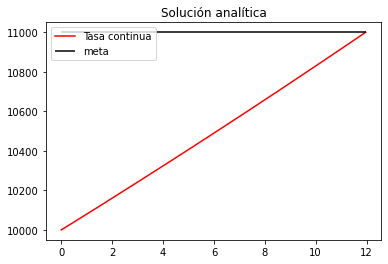

In [37]:
# Solución analítica
C0 = 10000
Cf = 11000
i = 0.008

r = np.log(1 + i)
tf = np.log(Cf / C0) / r
tf

t = np.linspace(0, tf, 200)

plt.plot(t, C0 * np.exp(r * t), 'r', label='Tasa continua')
plt.hlines(Cf, 0, tf, colors='k', label='meta')
plt.legend(loc='best')
plt.title('Solución analítica')
plt.show()

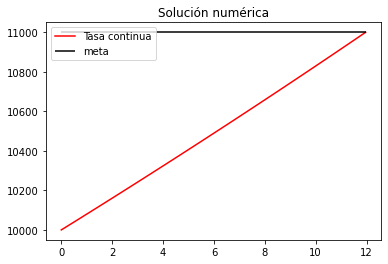

In [38]:
# Solución numérica
def cap_continuo(t, c, r):
    dc = r * c
    return dc

sol = ode.solve_ivp(cap_continuo, (0, tf), [C0], args=(r,), max_step=0.1)
t = sol.t
c = sol.y.T

plt.plot(t, c, 'r', label='Tasa continua')
plt.hlines(Cf, 0, tf, colors='k', label='meta')
plt.legend(loc='best')
plt.title('Solución numérica')
plt.show()

In [41]:
# Modelo de capitalización continua

def interes_continuo(C_0, meta, r):
    # Despejamos t
    t = np.log(meta/C_0)/r
    # Vector de capitales por periodo
    CC = ode.solve_ivp(cap_continuo, (0, t), [C0], max_step=.01, args=(r,))
    tt = CC.t
    # Gráfico
    plt.figure(num=1)
    plt.clf()                # Figura 1, borrar lo que contenga
    plt.plot(tt, CC.y.T,'-',linewidth=3.0)          # Se grafica la evolución de los capitales
    plt.plot(tt,meta*np.ones(len(tt)),'--k')    # Se grafica la meta
    plt.xlabel('t')                             # Etiqueta eje x
    plt.ylabel('C(t)')                          # Etiqueta eje y
    plt.grid(True)                              # Malla en la gráfica
    plt.show()                                  # Mostrar la figura
    print("El tiempo que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", t, " meses.", sep="")

i = 0.008

interact_manual(interes_continuo, C_0=fixed(10000), meta=(11000,20000,100), r=fixed(np.log(1+i)));

interactive(children=(IntSlider(value=15500, description='meta', max=20000, min=11000, step=100), Button(descr…

___
## Tabla de abonos
Como aplicación importante del concepto de interés compuesto se encuentra la creación de un modelo de cuenta de ahorro.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)
- http://pbpython.com/amortization-model.html
- https://pbpython.com/amortization-model-revised.html

## Debemos de instalar las paqueterías necesarias

> ## Numpy-financial
> To install this package run one of the following:
> `conda install -c conda-forge numpy-financial`

In [9]:
# Librería de análisis de datos
import pandas as pd
# Librería para manipulación de fechas
from datetime import date
import numpy as np
import numpy_financial as npf

In [2]:
# Datos para la cuenta de ahorro
tasa_interes = 0.08
years = 3
Abono_year = 12
inicial = 6000
meta = 50000
fecha_inicio = (date(2019,11,27))

In [10]:
help(npf.pmt)

Help on function pmt in module numpy_financial._financial:

pmt(rate, nper, pv, fv=0, when='end')
    Compute the payment against loan principal plus interest.
    
    Given:
     * a present value, `pv` (e.g., an amount borrowed)
     * a future value, `fv` (e.g., 0)
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * and (optional) specification of whether payment is made
       at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the (fixed) periodic payment.
    
    Parameters
    ----------
    rate : array_like
        Rate of interest (per period)
    nper : array_like
        Number of compounding periods
    pv : array_like
        Present value
    fv : array_like,  optional
        Future value (default = 0)
    when : {{'begin', 1}, {'end', 0}}, {string, int}
        When payments are due ('begin' (1) or 'end' (0))
    
    Returns
    -------
    out 

In [11]:
# Cálculo de abonos mensuales iguales para llegar a la meta de ahorro en el tiempo deseado
Abono = -npf.pmt(tasa_interes/Abono_year,years*Abono_year,(meta-inicial))
Abono

1378.8000803029693

In [14]:
# Rango de fechas en la tabla
rng = pd.date_range(fecha_inicio, periods=years*Abono_year, freq='M')
rng.name = 'Fecha del abono'
# Columnas de abonos y extracto de cuenta en las fechas respectivas
df = pd.DataFrame(index = rng,columns=['Abono','Balance'],dtype='float')
# Para poner el indice con los periodos y no con las fechas
df.reset_index(inplace=True)

df.index+=1
df.index.name='Periodo'
df.head()

,Fecha del abono,Abono,Balance
Periodo,,,
1,2019-11-30,NaN,NaN
2,2019-12-31,NaN,NaN
3,2020-01-31,NaN,NaN
4,2020-02-29,NaN,NaN
5,2020-03-31,NaN,NaN


In [18]:
npf.ppmt(tasa_interes/Abono_year, 1, years * Abono_year, Abono)

-34.01458267927129

In [16]:
# Los abonos son iguales
df['Abono'] = Abono
# Vector indizador de los periodos de los abonos
index_vector = np.arange(1,len(rng)+1)
# Extracto de la cuenta mes a mes
df["Balance"] = inicial * (1 + tasa_interes/Abono_year)**index_vector + \
                Abono * (((1 + tasa_interes/Abono_year)**index_vector - 1)/(tasa_interes/Abono_year))

df.head()

,Fecha del abono,Abono,Balance
Periodo,,,
1,2019-11-30,1378.80008,7418.800080
2,2019-12-31,1378.80008,8847.058828
3,2020-01-31,1378.80008,10284.839300
4,2020-02-29,1378.80008,11732.204976
5,2020-03-31,1378.80008,13189.219756


In [21]:
# Redondear con dos cifras decimales y mostrar DataFrame
df = df.round(2)
df

,Fecha del abono,Abono,Balance
Periodo,,,
1,2019-11-30,1378.8,7418.80
2,2019-12-31,1378.8,8847.06
3,2020-01-31,1378.8,10284.84
4,2020-02-29,1378.8,11732.20
5,2020-03-31,1378.8,13189.22
6,2020-04-30,1378.8,14655.95
7,2020-05-31,1378.8,16132.45
8,2020-06-30,1378.8,17618.80
9,2020-07-31,1378.8,19115.06


## Tarea.
> - Consultar tasas de interés reales en algún banco y proyectar un ahorro mensual para que al terminar su carrera tengan $\$85000$ MXN en su cuenta.
> - Hacer esto en un nuevo archivo, llamarlo Gi_T7ApellidoNombre.ipynb y subirlo a canvas. Donde $i=1,2$ es el número del grupo al que pertenece 
> - Plazo: 
> # Entrega 14 de noviembre a las 19:59 en parejas

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>